*Structure*:

* data [ folder 'data' ] 
* scripts [ folder 'src' ] 

*Colormap of the notebook:*

* <span style="color:red">assignment problem</span>. The red color indicates the task that should be done
* <span style="color:green">debugging</span>. The green tells you what is expected outcome. Its primarily goal to help you get the correct answer
* <span style="color:blue">comments</span>.

Assignment 3 (Two layer network)
======================



##### Preliminaries

In [1]:
# for compatability issues 
from __future__ import print_function

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable

In [4]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [5]:
# make plots a bit nicer
plt.matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [6]:
# random seed settings
torch.manual_seed(42)
np.random.seed(42)

# data type (useful to have in pytorch)
dtype_np = np.float64
dtype_torch = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # to run on GPU

##### Data (playground)

In [7]:
# load data
data = np.loadtxt('data/toy_data/data_class_train.txt')
dataX = data[:,0:2]
dataY = data[:,2]

In [8]:
n_samples = data.shape[0]
dim_in = 2 # two features
dim_out = 3 # three classes

n_train = int(n_samples * 0.7)
n_test = n_samples - n_train

In [9]:
# train-test partition
perm = np.random.permutation(n_samples)
train_indx = perm[:n_train]
test_indx = perm[n_train:]

dataX_train, dataY_train = dataX[train_indx,:], dataY[train_indx]
dataX_test, dataY_test = dataX[test_indx,:], dataY[test_indx]

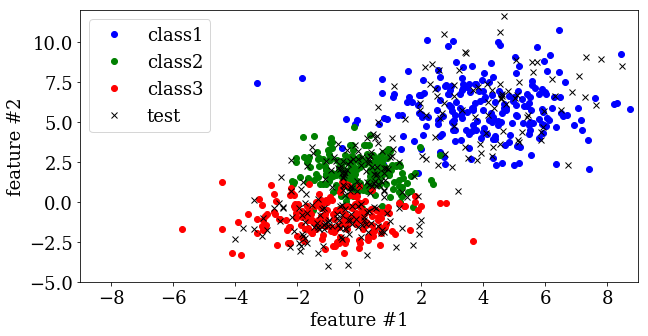

In [10]:
# visualize data
plt.figure(figsize=(10,5))
plt.plot(dataX_train[dataY_train==0,0], dataX_train[dataY_train==0,1],'ob', label="class1")
plt.plot(dataX_train[dataY_train==1,0], dataX_train[dataY_train==1,1],'og', label="class2")
plt.plot(dataX_train[dataY_train==2,0], dataX_train[dataY_train==2,1],'or', label="class3")

plt.plot(dataX_test[:,0], dataX_test[:,1],'xk', label="test")

plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.xlim(-9, 9)
plt.ylim(-5, 12);

##### Two-layer Network (by hand)

$$x_{hidden} = RELU(x  \cdot W_1 + b_1)$$
$$y_{pred} = x_{hidden} \cdot W_2 + b_2$$

In [11]:
dim_hidden = 100 # hidden dimension

In [12]:
# input 
x = Variable(torch.from_numpy(dataX_train).type(dtype_torch), requires_grad=False)
y = Variable(torch.from_numpy(dataY_train).type(torch.LongTensor), requires_grad=False)

* Weights and biases

<span style="color:red"> **[PROBLEM I]**: </span>   
<span style="color:red"> Fill the missing part (weights and biases for the output layer) </span>  

In [13]:
# Randomly initialize weights
w1_value = np.random.randn(dim_in, dim_hidden)
#w2_value = YOUR CODE HERE
w2_value = np.random.randn(dim_hidden, dim_out)

# [assingment] Randomly initialize biases
b1_value = np.random.randn(dim_hidden)
# b2_value = YOUR CODE HERE
b2_value = np.random.randn(dim_out)

In [14]:
w1 = Variable(torch.from_numpy(w1_value).type(dtype_torch), requires_grad=True)
w2 = Variable(torch.from_numpy(w2_value).type(dtype_torch), requires_grad=True)

b1 = Variable(torch.from_numpy(b1_value).type(dtype_torch), requires_grad=True)
b2 = Variable(torch.from_numpy(b2_value).type(dtype_torch), requires_grad=True)

* Loss (we will use cross-entropy loss)

In [15]:
criterion = nn.CrossEntropyLoss()

* learning parameters

In [16]:
learning_rate = 1e-3
n_iteration = 500

<span style="color:red"> **[PROBLEM II]**: </span>   
<span style="color:red"> Fill the missing part - *y_pred* </span>  

In [17]:
logger = {}
logger['iteration'] = []
logger['loss_iteration'] = []

for t in range(n_iteration):  
    
    # forward pass
    x_hidden = x.mm(w1) + b1.expand(n_train, dim_hidden)
    x_hidden_act = x_hidden.clamp(min=0) # apply RELU
    #y_pred = YOUR CODE HERE
    y_pred = x_hidden_act.mm(w2) + b2.expand(n_train, dim_out)
    
    # compute loss
    loss = criterion(y_pred, y)

    # backprop
    loss.backward()

    # update weights using gradient descent  
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    b1.data -= learning_rate * b1.grad.data
    b2.data -= learning_rate * b2.grad.data
    
    # manually zero the gradients
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    b1.grad.data.zero_()
    b2.grad.data.zero_()  
    
    # reporting & logging       
    if t % 100 == 0:
        print(t, loss.data[0])
        
    logger['iteration'] += [t]
    logger['loss_iteration'] += [loss.data[0]]

0 20.014324188232422
100 1.326693058013916
200 0.4813612103462219
300 0.38515686988830566
400 0.3476111888885498


<span style="color:green"> After visualizing the loss (cell below) you should see somethin like this </span>

<img src="fig/loss_toy.png" style="height:128px;" />

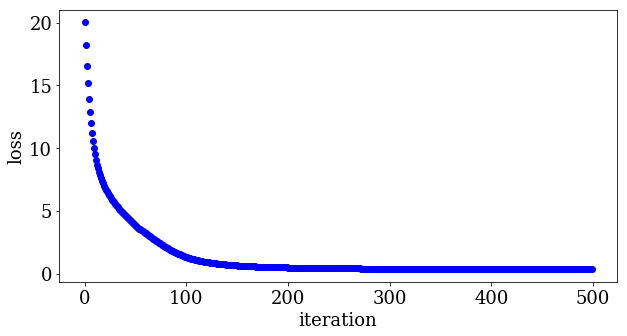

In [18]:
# visualize loss
plt.figure(figsize=(10,5))
plt.plot(logger['iteration'], logger['loss_iteration'],'ob', label="loss")

plt.xlabel('iteration')
plt.ylabel('loss');

<span style="color:red"> **[PROBLEM III]**: </span>   
<span style="color:red"> Implement the fuction which takes x and predicts its class </span>  

In [19]:
def predict(x, w1, b1, w2, b2, dtype_torch=torch.FloatTensor):
    """
    Predictation based on two-layer model (by hand)
    
    Args:
        x (numpy.array): sample
        w1, b1, w2, b2 (torch.Tensor) : weights and biases 
    Returns:
        scalar: predicted class
    """
    #YOUR CODE HERE    
    t = torch.from_numpy(x).type(dtype_torch)
    forward_pass = t.view(1,2).mm(w1.data).add(b1.data).clamp(min=0).mm(w2.data).add(b2.data).numpy()
    return np.argmax(forward_pass)

<span style="color:green"> by running the following command you should get number bigger 8 </span>

In [20]:
np.sum(np.equal([predict(x, w1, b1, w2, b2) for x in dataX_train[:10]], [0, 2, 0, 1, 0, 2, 0, 0, 1, 0]))

10

* Calculate accuracy

In [21]:
def get_accuracy(y, y_pred):
    """
    Calculate accuracy given y and y_predicted
    
    Args:
        y (numpy.array): ground truth
        y_pred (numpy.array): predictated values
         
    Returns:
        scalar: accuracy
    """
    n_samples = y.shape[0]
    return np.sum(y == y_pred)/n_samples * 100

In [22]:
y_train_predict = np.zeros(n_train)
for i in range(n_train):
    y_train_predict[i] = predict(dataX_train[i], w1, b1, w2, b2)

print("Train accuracy: %f" % get_accuracy(y_train_predict, dataY_train))

Train accuracy: 92.698413


<span style="color:red"> **[PROBLEM IV]**: </span>   
<span style="color:red"> Calculate accuracy on the test set </span>

In [23]:
#YOUR CODE HERE

* Visualize decision boundary

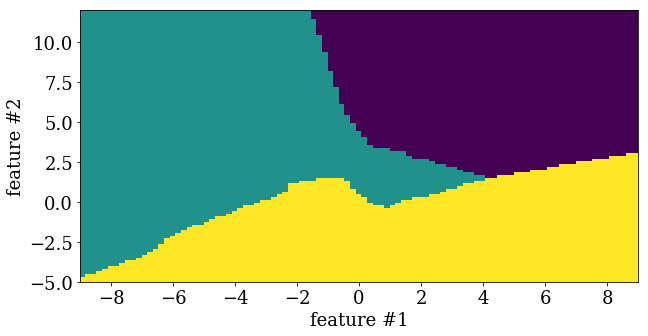

In [24]:
Nspace = 100
x1space = np.linspace(-9, 9, Nspace)
x2space = np.linspace(-5, 12, Nspace)
X,Y = np.meshgrid(x1space, x2space)

Z = np.zeros((Nspace,Nspace))
for i in range(Nspace):
    for j in range(Nspace):
        x1 = x1space[j]
        y1 = x2space[i]
        x = np.array([x1,y1])
        Z[i,j] = predict(x, w1, b1, w2, b2)

plt.figure(figsize=(10,5))
plt.pcolor(X, Y, Z, vmin=abs(Z).min(), vmax=abs(Z).max())

plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.xlim(-9, 9)
plt.ylim(-5, 12);

##### Two-layer Network, again ...  (with nn package) 

$$x_{hidden} = RELU(x  \cdot W_1 + b_1)$$
$$y_{pred} = x_{hidden} \cdot W_2 + b_2$$

After some hard work we will use torch with all it power and elegance.  

* Model

In [25]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
            torch.nn.Linear(dim_in, dim_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(dim_hidden, dim_out),
        )

In [26]:
model

Sequential (
  (0): Linear (2 -> 100)
  (1): ReLU ()
  (2): Linear (100 -> 3)
)

* Loss (we will use cross-entropy loss)

In [27]:
criterion = nn.CrossEntropyLoss()

In [28]:
# input 
x = Variable(torch.from_numpy(dataX_train).type(dtype_torch), requires_grad=False)
y = Variable(torch.from_numpy(dataY_train).type(torch.LongTensor), requires_grad=False)

In [29]:
learning_rate = 1e-2
n_iteration = 1000

In [30]:
logger = {}
logger['iteration'] = []
logger['loss_iteration'] = []

for t in range(n_iteration):  
    
    # forward pass
    y_pred = model(x)
    
    # compute loss
    loss = criterion(y_pred, y)

    # backprop
    loss.backward()

    # update weights using gradient descent  
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data 
    
    # manually zero the gradients
    model.zero_grad()  
    
    # reporting & logging       
    if t % 100 == 0:
        print(t, loss.data[0])
        
    logger['iteration'] += [t]
    logger['loss_iteration'] += [loss.data[0]]

0 1.1320149898529053
100 0.3248666524887085
200 0.2556443214416504
300 0.22190380096435547
400 0.20150381326675415
500 0.18788287043571472
600 0.17819644510746002
700 0.1709987223148346
800 0.1654558628797531
900 0.1610780656337738


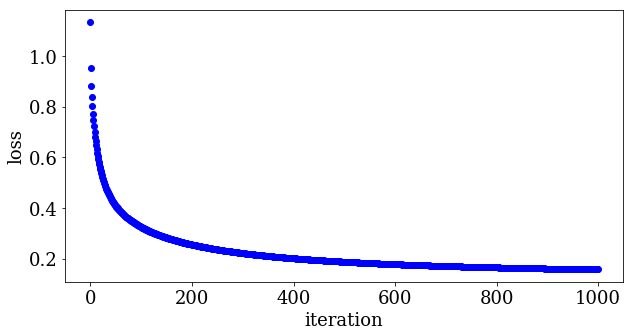

In [31]:
# visualize loss
plt.figure(figsize=(10,5))
plt.plot(logger['iteration'], logger['loss_iteration'],'ob', label="loss")

plt.xlabel('iteration')
plt.ylabel('loss');

In [32]:
def predict(x, model):
    """
    Predictation based on two-layer model
    
    Args:
        x (numpy.array):  
         
    Returns:
        scalar: predicted class
    """    
    t = Variable(torch.from_numpy(x).type(dtype_torch))
    forward_pass = model(t)
    return np.argmax(forward_pass.data.numpy(), axis=1)

In [33]:
y_train_predict = predict(dataX_train,model)
print("Train accuracy: %f" % get_accuracy(y_train_predict, dataY_train))

y_test_predict = predict(dataX_test, model)
print("Test accuracy: %f" % get_accuracy(y_test_predict, dataY_test))

Train accuracy: 95.396825
Test accuracy: 95.925926


### Two-layer Network for our dataset 

In [34]:
from src.data_set import DataSetCifar10, DataSetDTD

In [46]:
!./data/get_cifar10_dataset.sh

/home/andrey/LDSSS2017/assigments/data
file exists


In [47]:
path_data = 'data' # !!! CHANGE !!!

* Hyper-parameters

In [48]:
dim_hidden = 500
num_epochs = 10
learning_rate = 1e-3
batch_size=100

You can choose one the courses datasets (cifar10 or DTD)

In [49]:
data_set = DataSetCifar10(path_data, num_dunkeys=4, batch_size=batch_size)
#data_set = DataSetDTD(path_data, num_dunkeys=4, batch_size=100, fin_scale=32)

We define a helper function

In [50]:
def make_test(data_loader, model_current, train_test):
    model.eval()
    correct = 0
    total = 0
    for images_, labels_ in data_loader[train_test]:
        N, C, H, W = images_.size() # read in N, C, H, W, C, H, W = x.size() # read in N, C, H, W
        images_ = Variable(images_.view(N, -1))
        outputs_ = model_current(images_)
        _, predicted = torch.max(outputs_.data, 1)
        total += labels_.size(0)
        correct += (predicted == labels_).sum()
    print('accuracy[' + train_test + '] : %f %%' % (100 * correct / total))

<span style="color:red"> **[PROBLEM IV]**: </span>   
<span style="color:red"> Correctly specify the dimensions of the model </span>

In [51]:
model = torch.nn.Sequential(
            torch.nn.Linear(32*32*3, dim_hidden), # YOUR CODE HERE
            torch.nn.ReLU(),
            torch.nn.Linear(dim_hidden, 10), # YOUR CODE HERE
        )

* define optimizer

In [52]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [53]:
# train

t = 0
logger = {}
logger['iteration'] = []
logger['loss_iteration'] = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(data_set.loader['train']):
        # get data to train
        N, C, H, W = images.size() # read in N, C, H, W, C, H, W = x.size() # read in N, C, H, W
        images = Variable(images.view(N, -1))
        labels = Variable(labels)

        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # reporting & logging
        logger['iteration'] += [t]
        logger['loss_iteration'] += [loss.data[0]]
        t += 1
        if t % 100 == 0:
            print('epoch: [%d/%d], step: [%d/%d], loss: %.4f' %
                   (epoch + 1, num_epochs, i+1, len(data_set.dataset['train'])//batch_size, loss.data[0]))
        
    print('--- epoch: [%d, %d]' % (epoch + 1, num_epochs))
    #make_test(data_set.loader, model, 'train')
    make_test(data_set.loader, model, 'test')

    # switch back to the training  mode
    model.train()

epoch: [1/10], step: [100/500], loss: 1.7075
epoch: [1/10], step: [200/500], loss: 1.6355
epoch: [1/10], step: [300/500], loss: 1.5349
epoch: [1/10], step: [400/500], loss: 1.5787
epoch: [1/10], step: [500/500], loss: 1.4729
--- epoch: [1, 10]
accuracy[test] : 44.610000 %
epoch: [2/10], step: [100/500], loss: 1.4408
epoch: [2/10], step: [200/500], loss: 1.3854
epoch: [2/10], step: [300/500], loss: 1.2459
epoch: [2/10], step: [400/500], loss: 1.5767
epoch: [2/10], step: [500/500], loss: 1.6417
--- epoch: [2, 10]
accuracy[test] : 47.580000 %
epoch: [3/10], step: [100/500], loss: 1.4001
epoch: [3/10], step: [200/500], loss: 1.4572
epoch: [3/10], step: [300/500], loss: 1.4049
epoch: [3/10], step: [400/500], loss: 1.5130
epoch: [3/10], step: [500/500], loss: 1.4149
--- epoch: [3, 10]
accuracy[test] : 47.880000 %
epoch: [4/10], step: [100/500], loss: 1.3192
epoch: [4/10], step: [200/500], loss: 1.2295
epoch: [4/10], step: [300/500], loss: 1.5270
epoch: [4/10], step: [400/500], loss: 1.4009
e

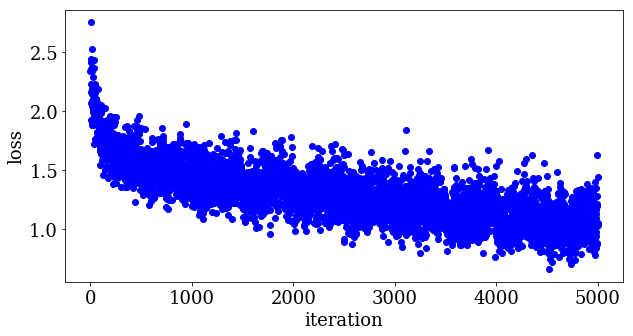

In [54]:
# visualize loss
plt.figure(figsize=(10,5))
plt.plot(logger['iteration'], logger['loss_iteration'],'ob', label="loss")

plt.xlabel('iteration')
plt.ylabel('loss');